In [1]:
import sys
sys.path.append('../')
import numpy as np
import torch
from torch.distributions import kl_divergence
import matplotlib.pyplot as plt
from piecewise_linear import PiecewiseLinear, BinaryPWL
plt.style.use('seaborn')

In [4]:
def plot_dist(p, support=[0, 1], num_samples=100000):
    """
    Plot pdf, cdf, icdf of distribution p, and show samples from distribution.
    """
    # Make x and samples
    x = torch.linspace(*support, 1000).view(1, 1, -1)
    s = p.sample(torch.Size([num_samples]))
    
    plt.figure(figsize=[10, 2])
    # Plot pdf
    plt.subplot(1,3,1)
    plt.title('pdf')
    plt.hist(s.squeeze(), bins=100, density=True, alpha=0.7)
    plt.plot(x.squeeze().numpy(), p.pdf(x).squeeze().numpy())
    
    # Plot cdf
    plt.subplot(1,3,2)
    plt.title('cdf')
    plt.hist(s.squeeze(), bins=100, density=True, alpha=0.7, cumulative=True)
    plt.plot(x.squeeze().numpy(), p.cdf(x).squeeze().numpy())
    plt.subplot(1,3,3)
    
    # Plot icdf
    plt.title('icdf')
    x = torch.linspace(1e-6, 1-1e-6, 1000).view(1, 1, -1)
    plt.plot(x.squeeze().numpy(), p.icdf(x).squeeze().numpy())
    plt.show()
    
def estimate_CE(p, q, n_samples=1):
    x = p.sample(sample_shape=torch.Size([n_samples]))
    cross_entropy = - q.log_prob(x).squeeze().mean(-1)
    return cross_entropy

def estimate_entropy(p, n_samples=1):
    x = p.sample(sample_shape=torch.Size([n_samples]))
    p_entropy = - p.log_prob(x).squeeze().mean(-1)
    return p_entropy

def estimate_kl(p, q, n_samples=1):
    x = p.sample(sample_shape=torch.Size([n_samples]))
    p_entropy = - p.log_prob(x).squeeze().mean(-1)
    cross_entropy = - q.log_prob(x).squeeze().mean(-1)
    return cross_entropy - p_entropy

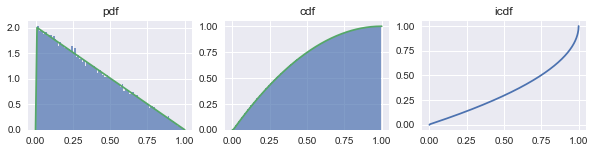

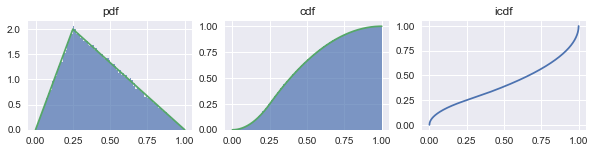

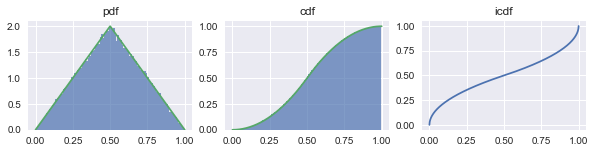

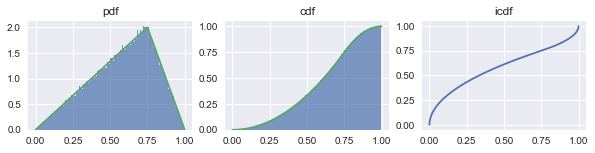

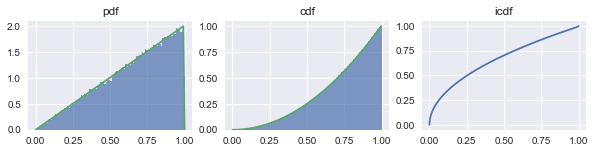

In [5]:
def make_triangular(p):
    """A PWL triangular distribution"""
    x = torch.Tensor([0, p, 1]).view(1, 1, -1)
    y = torch.Tensor([0, 2, 0]).view(1, 1, -1)
    return PiecewiseLinear(x, y)

for v in [0.01, 0.25, 0.5, 0.75, 0.99]:
    p = make_triangular(v)
    plot_dist(p)

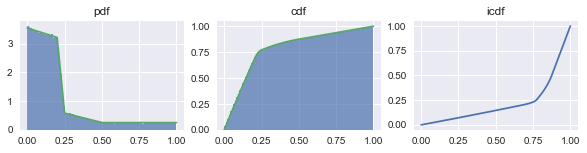

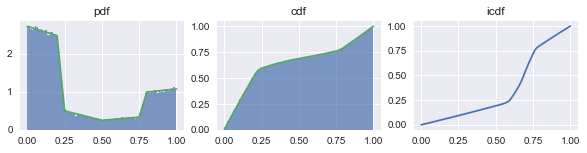

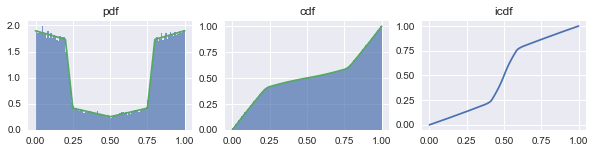

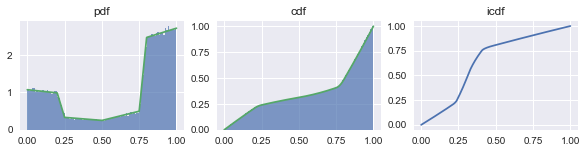

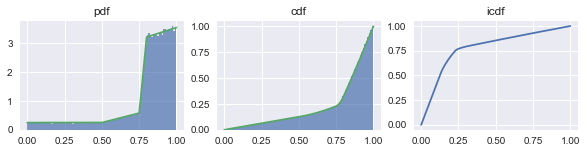

In [6]:
for v in [0., 0.25, 0.5, 0.75, 1]:
    p = BinaryPWL(torch.Tensor([[v]]), w_c=0.25, h_d=0.25)
    plot_dist(p)